In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
import seaborn as sns
#import pyarrow.feather as feather

# Demographic Data
### Load data from demographic file

In [2]:
#import demographic dataframe
demos = pd.read_pickle('demos_clean.pkl')

# Motion Data
### Load motion data

In [18]:
#Load motion data fromm CSV 
motion_file = r'Source_Data\Micro_Motion_2012\mocap_data\nmA.tsv'
motion_rawA = pd.read_csv(motion_file, delimiter='\t', encoding='utf-8', skiprows=10, low_memory=False)

In [19]:
#review motion data formating
print(motion_rawA.head())
print(motion_rawA.info())

   static X  static Y  static Z     s1 X      s1 Y      s1 Z     s2 X  \
0  1243.829   889.333  1784.341  159.596  1845.594  1732.156  927.264   
1  1243.832   889.318  1784.349  159.583  1845.451  1732.144  927.266   
2  1243.835   889.317  1784.334  159.584  1845.308  1732.126  927.277   
3  1243.816   889.327  1784.333  159.587  1845.180  1732.105  927.261   
4  1243.806   889.341  1784.343  159.597  1845.072  1732.103  927.284   

       s2 Y      s2 Z      s3 X  ...    s10 X    s10 Y     s10 Z     s11 X  \
0  1928.828  1696.346  1738.201  ...  892.079  161.142  1812.422  1676.339   
1  1928.791  1696.369  1738.162  ...  892.071  161.157  1812.413  1676.271   
2  1928.752  1696.383  1738.095  ...  892.068  161.142  1812.395  1676.257   
3  1928.725  1696.360  1738.024  ...  892.057  161.145  1812.397  1676.118   
4  1928.722  1696.362  1738.010  ...  892.062  161.147  1812.395  1676.077   

     s11 Y     s11 Z     s12 X   s12 Y     s12 Z  Unnamed: 27  
0  170.687  1916.486  2488.2

The motion data seems pretty clean with only the elimination of a single empty column, 'Unnamed: 27', needing to be removed

In [5]:
motion_rawA.drop(columns='Unnamed: 27', inplace=True)
motion_rawA.columns

Index(['static X', 'static Y', 'static Z', 's1 X', 's1 Y', 's1 Z', 's2 X',
       's2 Y', 's2 Z', 's3 X', 's3 Y', 's3 Z', 's4 X', 's4 Y', 's4 Z', 's9 X',
       's9 Y', 's9 Z', 's10 X', 's10 Y', 's10 Z', 's11 X', 's11 Y', 's11 Z',
       's12 X', 's12 Y', 's12 Z'],
      dtype='object')

### Break up motion by participant
First workout system with single paticipant, then expand with function

In [6]:
#Extract motion data for perticipant 1
motion1 = motion_rawA.iloc[:,3:6].copy(deep=True)
motion1.head()

s1 X      s1 Y      s1 Z
0  159.596  1845.594  1732.156
1  159.583  1845.451  1732.144
2  159.584  1845.308  1732.126
3  159.587  1845.180  1732.105
4  159.597  1845.072  1732.103

In [7]:
#add participant ID column
motion1['PID']=1

In [8]:
motion1.head()  

s1 X      s1 Y      s1 Z  PID
0  159.596  1845.594  1732.156    1
1  159.583  1845.451  1732.144    1
2  159.584  1845.308  1732.126    1
3  159.587  1845.180  1732.105    1
4  159.597  1845.072  1732.103    1

In [9]:
motion1.merge(demos, how='left', on='PID')

s1 X      s1 Y      s1 Z  PID Group  Subject  Age Sex  Height  \
0      159.596  1845.594  1732.156    1     A        1   23   M    1.72   
1      159.583  1845.451  1732.144    1     A        1   23   M    1.72   
2      159.584  1845.308  1732.126    1     A        1   23   M    1.72   
3      159.587  1845.180  1732.105    1     A        1   23   M    1.72   
4      159.597  1845.072  1732.103    1     A        1   23   M    1.72   
...        ...       ...       ...  ...   ...      ...  ...  ..     ...   
35996  160.090  1837.312  1715.629    1     A        1   23   M    1.72   
35997  160.122  1837.488  1715.619    1     A        1   23   M    1.72   
35998  160.128  1837.653  1715.597    1     A        1   23   M    1.72   
35999  160.147  1837.829  1715.599    1     A        1   23   M    1.72   
36000  160.141  1837.983  1715.592    1     A        1   23   M    1.72   

       Listen  ...  Exercise  Tiresome  Exper_silent  Exper_music  Eyes  \
0           5  ...       7.0         3           3.0            2   1.0   
1           5  ...       7.0         3           3.0            2   1.0   
2           5  ...       7.0         3           3.0            2   1.0   
3           5  ...       7.0         3           3.0            2   1.0   
4           5  ...       7.0         3           3.0            2   1.0   
...       ...  ...       ...       ...           ...          ...   ...   
35996       5  ...       7.0         3           3.0            2   1.0   
35997       5  ...       7.0         3           3.0            2   1.0   
35998       5  ...       7.0         3           3.0            2   1.0   
35999       5  ...       7.0         3           3.0            2   1.0   
36000       5  ...       7.0         3           3.0            2   1.0   

       Knees  Mean QoM  Mean QoM w/oM  Mean QoM w M  NoMus-Mus Diff  
0        1.0  8.271082       7.955534      8.586613        0.631079  
1        1.0  8.271082       7.955534      8.586613        0.631079  
2        1.0  8.271082       7.955534      8.586613        0.631079  
3        1.0  8.271082       7.955534      8.586613        0.631079  
4        1.0  8.271082       7.955534      8.586613        0.631079  
...      ...       ...            ...           ...             ...  
35996    1.0  8.271082       7.955534      8.586613        0.631079  
35997    1.0  8.271082       7.955534      8.586613        0.631079  
35998    1.0  8.271082       7.955534      8.586613        0.631079  
35999    1.0  8.271082       7.955534      8.586613        0.631079  
36000    1.0  8.271082       7.955534      8.586613        0.631079  

[36001 rows x 22 columns]

### Load all motion data

In [20]:
#Function for import all motion data into dataframes by group
def Get_motion(demos=demos):
    #takes in the demos dataframe as reference for group names and imports each motion data csv to a group key in a dictionary that is returned
    groups = demos['Group'].unique()
    motion_dfs = {}
    for group in groups:
        if group != 'P':
            motion_file = r'Source_Data\Micro_Motion_2012\mocap_data\nm' + group + '.tsv'
            motion_dfs[group] = pd.read_csv(motion_file, delimiter='\t', encoding='utf-8', skiprows=10, low_memory=False)
    return motion_dfs

In [21]:
#create diction of motion dataframes (one per group)
Motion_dict = Get_motion()

In [22]:
#view example of one group
Motion_dict['A']

static X  static Y  static Z     s1 X      s1 Y      s1 Z     s2 X  \
0      1243.829   889.333  1784.341  159.596  1845.594  1732.156  927.264   
1      1243.832   889.318  1784.349  159.583  1845.451  1732.144  927.266   
2      1243.835   889.317  1784.334  159.584  1845.308  1732.126  927.277   
3      1243.816   889.327  1784.333  159.587  1845.180  1732.105  927.261   
4      1243.806   889.341  1784.343  159.597  1845.072  1732.103  927.284   
...         ...       ...       ...      ...       ...       ...      ...   
35996  1243.834   889.330  1784.266  160.090  1837.312  1715.629  926.006   
35997  1243.851   889.340  1784.296  160.122  1837.488  1715.619  926.035   
35998  1243.860   889.326  1784.315  160.128  1837.653  1715.597  926.100   
35999  1243.845   889.320  1784.296  160.147  1837.829  1715.599  926.172   
36000  1243.841   889.329  1784.300  160.141  1837.983  1715.592  926.228   

           s2 Y      s2 Z      s3 X  ...    s10 X    s10 Y     s10 Z  \
0      1928.828  1696.346  1738.201  ...  892.079  161.142  1812.422   
1      1928.791  1696.369  1738.162  ...  892.071  161.157  1812.413   
2      1928.752  1696.383  1738.095  ...  892.068  161.142  1812.395   
3      1928.725  1696.360  1738.024  ...  892.057  161.145  1812.397   
4      1928.722  1696.362  1738.010  ...  892.062  161.147  1812.395   
...         ...       ...       ...  ...      ...      ...       ...   
35996  2015.569  1658.447  1722.102  ...  887.312  212.860  1805.355   
35997  2015.715  1658.400  1722.103  ...  887.302  212.862  1805.363   
35998  2015.903  1658.342  1722.099  ...  887.317  212.866  1805.360   
35999  2016.071  1658.291  1722.080  ...  887.334  212.856  1805.364   
36000  2016.230  1658.216  1722.070  ...  887.339  212.849  1805.362   

          s11 X    s11 Y     s11 Z     s12 X   s12 Y     s12 Z  Unnamed: 27  
0      1676.339  170.687  1916.486  2488.200  92.625  1724.076          NaN  
1      1676.271  170.771  1916.484  2488.209  92.569  1724.076          NaN  
2      1676.257  170.845  1916.480  2488.233  92.538  1724.074          NaN  
3      1676.118  170.953  1916.445  2488.217  92.509  1724.074          NaN  
4      1676.077  171.052  1916.463  2488.227  92.472  1724.091          NaN  
...         ...      ...       ...       ...     ...       ...          ...  
35996  1657.130  178.455  1912.215  2484.567  77.713  1725.589          NaN  
35997  1657.089  178.484  1912.212  2484.546  77.710  1725.613          NaN  
35998  1656.966  178.534  1912.225  2484.482  77.710  1725.607          NaN  
35999  1656.918  178.551  1912.225  2484.458  77.699  1725.613          NaN  
36000  1656.848  178.572  1912.222  2484.428  77.678  1725.626          NaN  

[36001 rows x 28 columns]

In [23]:
#strip out each particpant from each dataframe and combine them with demographic data
def Participants(df, participant_count):
    participant_dfs = {}
    participant_dfs['count'] = participant_count
    print(participant_count)
    dict_key = 1
    for i in range(0,participant_count*3, 3):
        participant_dfs[dict_key] = df.iloc[:,i+3:i+6].copy(deep=True)
        dict_key += 1
    return participant_dfs

In [24]:
#Fill dictionaries for each group with motion data. Participant numbers taken from excel file
A = Participants(Motion_dict['A'],8)
B = Participants(Motion_dict['B'],9)
C = Participants(Motion_dict['C'],12)
D = Participants(Motion_dict['D'],11)
E = Participants(Motion_dict['E'],9)
F = Participants(Motion_dict['F'],5)
G = Participants(Motion_dict['G'],11)
H = Participants(Motion_dict['H'],9)

8
9
12
11
9
5
11
9


In [25]:
#Add global participant ID to each participant in each group
def Add_PID(list_of_dicts):
    #takes in list of dictionaries of groups dataframes and for each participant in each group it adds a column for global participant
    PID = 1
    for group in list_of_dicts:
        for participant in range(1, group['count']+1):
            group[participant]['PID'] = PID
            PID += 1
            

In [26]:
#create list of dictionaries
group = [A, B, C, D, E, F, G, H]

In [27]:
#run function to add PID column
Add_PID(group)

In [28]:
#check example dataframe vs. demo to confirm PID column carried through correctly
B[3].head()

s3 X      s3 Y      s3 Z  PID
0  1759.815  1842.208  1757.661   11
1  1759.828  1842.222  1757.661   11
2  1759.834  1842.235  1757.630   11
3  1759.889  1842.232  1757.642   11
4  1759.908  1842.241  1757.633   11

In [29]:
#3rd subject in group B is global participant 11, confirmed same as above check
demos[demos['Group']=='B']

Group  Subject  Age  Sex  Height  Listen  Produce  Dance  Exercise  \
8      B        1   35    M    1.81       1     40.0    0.5       0.5   
9      B        2   23    M    1.77      20     30.0    0.0       3.0   
10     B        3   19  NaN    1.75      10      5.0    0.0       1.0   
11     B        4   19    M    1.79      10      5.0    0.0       3.0   
12     B        5   20    M    1.80      30      1.5    0.3       2.0   
13     B        7   23    F    1.80      20     30.0    2.0       5.0   
14     B        8   18    F    1.74      20     10.0    2.0       3.0   
15     B       11   25    F    1.70      10     20.0    1.0       3.0   
16     B       12   18    M    1.64      20      5.0    0.0       2.0   

    Tiresome  Exper_silent  Exper_music  Eyes  Knees  Mean QoM  Mean QoM w/oM  \
8          3           2.0            1   1.0    1.0  6.396772       6.241781   
9          3           3.0            3   1.0    0.0  5.439222       5.344227   
10         3           3.0            3   0.5    0.5  6.938004       7.208790   
11         3           3.0            4   0.5    0.5  6.370096       5.760961   
12         2           1.0            2   0.5    0.5  8.598994       8.115109   
13         3           3.0            1   1.0    0.5  5.991867       5.713994   
14         2           3.0            3   1.0    1.0  7.668269       7.614238   
15         4           4.0            3   1.0    0.5  6.222381       6.298102   
16         3           4.0            4   1.0    1.0  5.033449       5.059338   

    Mean QoM w M  NoMus-Mus Diff  PID  
8       6.551754        0.309973    9  
9       5.534211        0.189984   10  
10      6.667233       -0.541557   11  
11      6.979198        1.218237   12  
12      9.082852        0.967742   13  
13      6.269724        0.555730   14  
14      7.722296        0.108057   15  
15      6.146664       -0.151438   16  
16      5.007562       -0.051776   17

In [30]:
#rename X, Y, Z motion columns
def Rename_motion_columns(group_dict):
    for participant in group_dict.keys():
        if participant == 'count':
            continue
        else:
            group_dict[participant].columns = ['X','Y','Z','PID']
    

In [31]:
#Rename each participant dataframe columns (had issue with doing this in for loop, but easy enough to just repeat)
Rename_motion_columns(A)
Rename_motion_columns(B)
Rename_motion_columns(C)
Rename_motion_columns(D)

Rename_motion_columns(F)
Rename_motion_columns(G)
Rename_motion_columns(H)

In [32]:
def Scatter_Group(dict_dfs, ax):
    axls = ax.flatten()
    for p in range(len(dict_dfs)):
        if p == 0:
            continue
        else:
            plt.axes(axls[p-1])
            sns.scatterplot(x='X', y='Y', hue='Z', data=dict_dfs[p], palette='viridis')
            title = dict_dfs[p]['PID'].mean()
            plt.title('Participant ' + str(title))

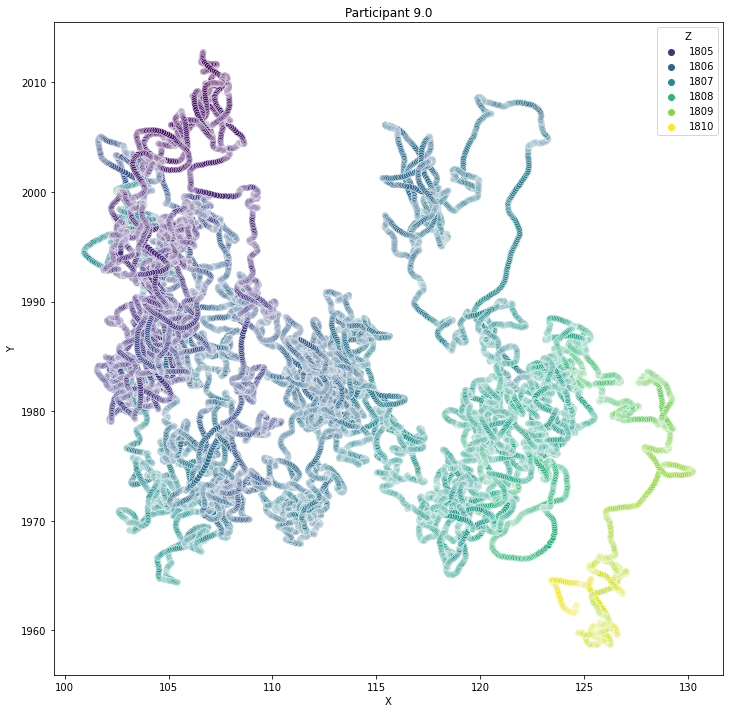

In [33]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='X', y='Y', hue='Z', data=B[1], palette='viridis')
title = B[1]['PID'].mean()
plt.title('Participant ' + str(title))
plt.show()

### Plot X, Y, Z data per participant

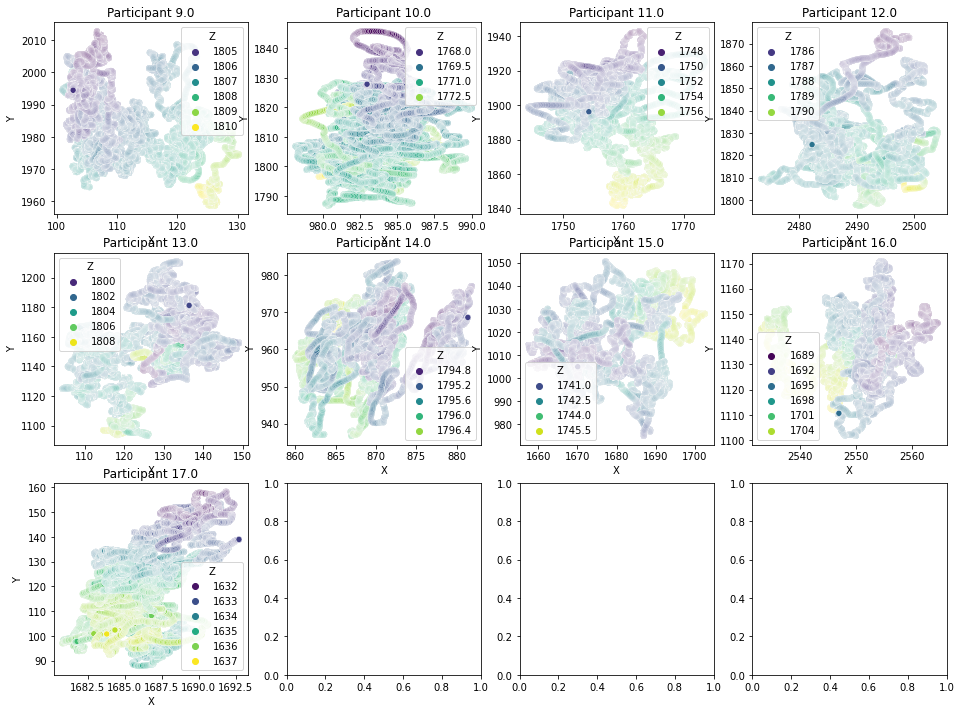

In [34]:
fig, axes_avail = plt.subplots(3, 4, figsize=(16,12))

Scatter_Group(B, axes_avail)
plt.show()

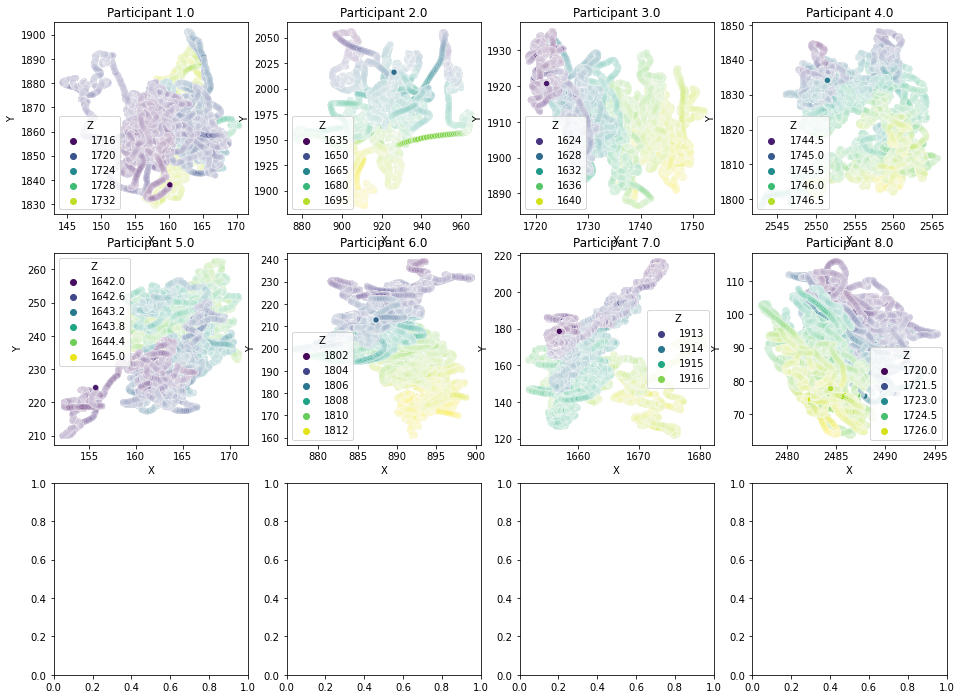

In [35]:
fig, axes_avail = plt.subplots(3, 4, figsize=(16,12))
Scatter_Group(A, axes_avail)
plt.show()

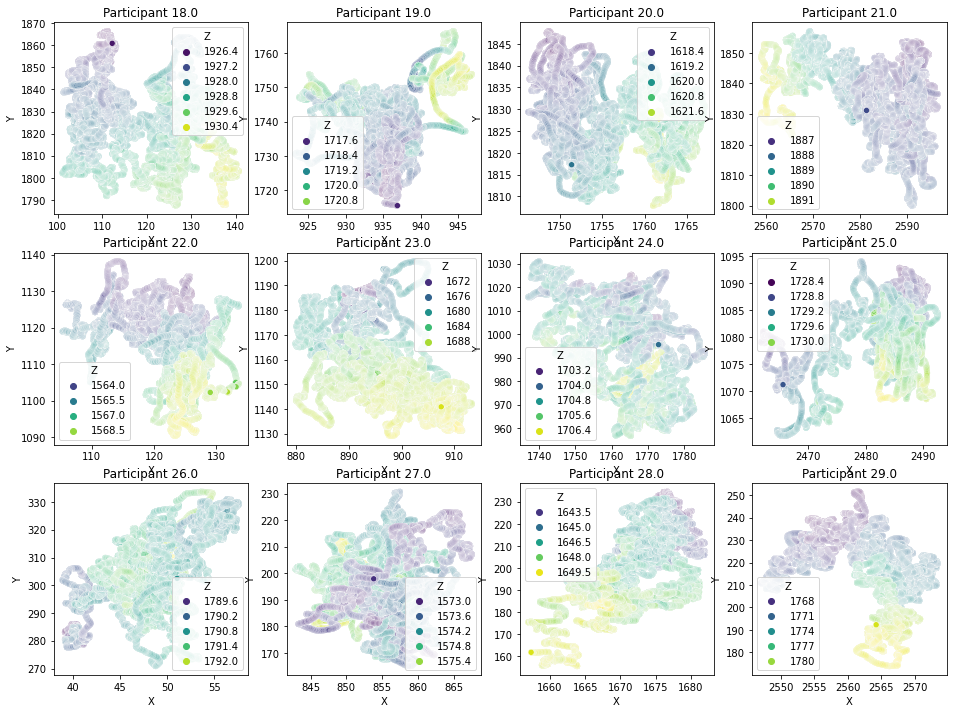

In [36]:
fig, axes_avail = plt.subplots(3, 4, figsize=(16,12))
Scatter_Group(C, axes_avail)
plt.show()

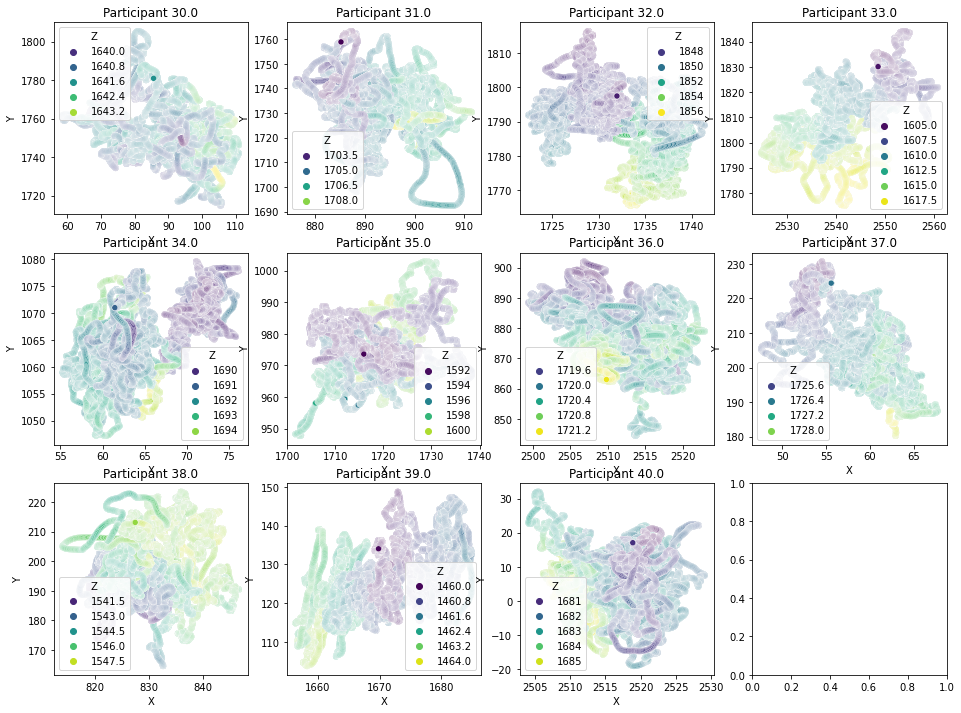

In [37]:
fig, axes_avail = plt.subplots(3, 4, figsize=(16,12))
Scatter_Group(D, axes_avail)
plt.show()

In [38]:
#fig, axes_avail = plt.subplots(3, 4, figsize=(16,12))
#Scatter_Group(E, axes_avail)
#plt.show()
#Ran into an error taking more of a look at the group data
E[9]

Unnamed: 27  PID
0              NaN   49
1              NaN   49
2              NaN   49
3              NaN   49
4              NaN   49
...            ...  ...
35796          NaN   49
35797          NaN   49
35798          NaN   49
35799          NaN   49
35800          NaN   49

[35801 rows x 2 columns]

In [39]:
#Reloading the base group data to take a look
motion_file = r'Source_Data\Micro_Motion_2012\mocap_data\nmE.tsv'
motionE = pd.read_csv(motion_file, delimiter='\t', encoding='utf-8', skiprows=10, low_memory=False)
motionE.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35801 entries, 0 to 35800
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   s3 X         35801 non-null  float64
 1   s3 Y         35801 non-null  float64
 2   s3 Z         35801 non-null  float64
 3   s4 X         35801 non-null  float64
 4   s4 Y         35801 non-null  float64
 5   s4 Z         35801 non-null  float64
 6   s5 X         35801 non-null  float64
 7   s5 Y         35801 non-null  float64
 8   s5 Z         35801 non-null  float64
 9   s6 X         35801 non-null  float64
 10  s6 Y         35801 non-null  float64
 11  s6 Z         35801 non-null  float64
 12  s7 X         35801 non-null  float64
 13  s7 Y         35801 non-null  float64
 14  s7 Z         35801 non-null  float64
 15  s8 X         35801 non-null  float64
 16  s8 Y         35801 non-null  float64
 17  s8 Z         35801 non-null  float64
 18  s9 X         35801 non-null  float64
 19  s9 Y

Group E appears to be missing a static column, which means the separate participant call earlier didn't sperate it correctly. Needs to reload E. 

In [40]:
#Reloading group E
motion_file = r'Source_Data\Micro_Motion_2012\mocap_data\nmE.tsv'
motionE = pd.read_csv(motion_file, delimiter='\t', encoding='utf-8', skiprows=10, low_memory=False)
E = {}
E['count'] = 9
dict_key = 1
for i in range(0, 9*3, 3):
    E[dict_key] = motionE.iloc[:,i:i+3].copy(deep=True)
    dict_key += 1
E[9].head()

s12 X    s12 Y     s12 Z
0  3140.118 -262.589  1809.224
1  3140.132 -262.576  1809.225
2  3140.114 -262.552  1809.232
3  3140.220 -262.601  1809.264
4  3140.145 -262.563  1809.226

In [41]:
#Rerunning previous functions for formatting
Add_PID([E])
Rename_motion_columns(E)

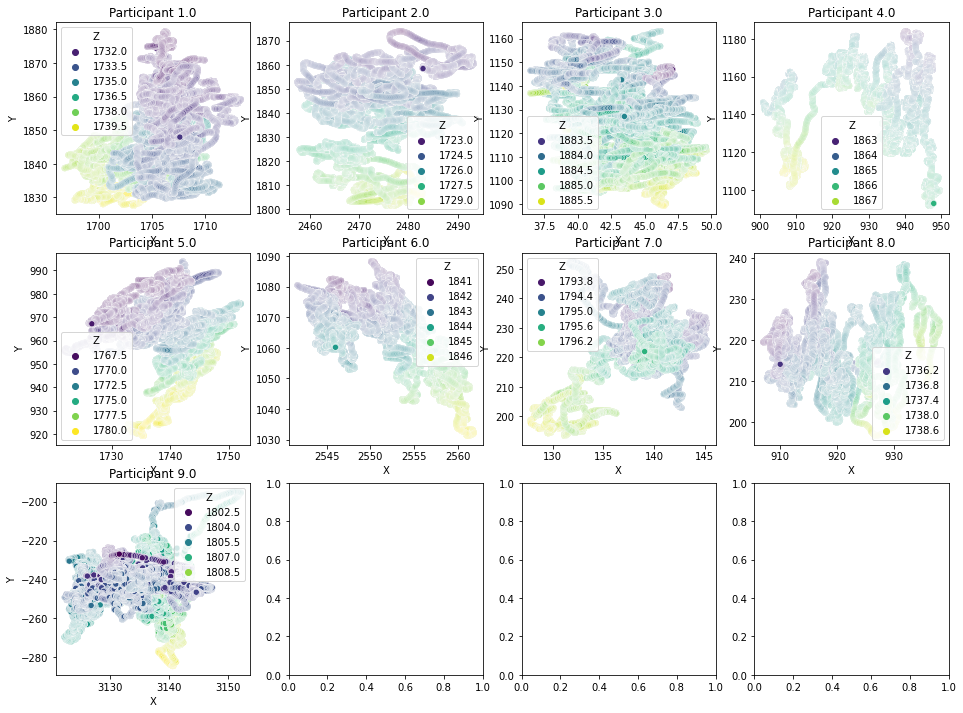

In [42]:
fig, axes_avail = plt.subplots(3, 4, figsize=(16,12))
Scatter_Group(E, axes_avail)
plt.show()

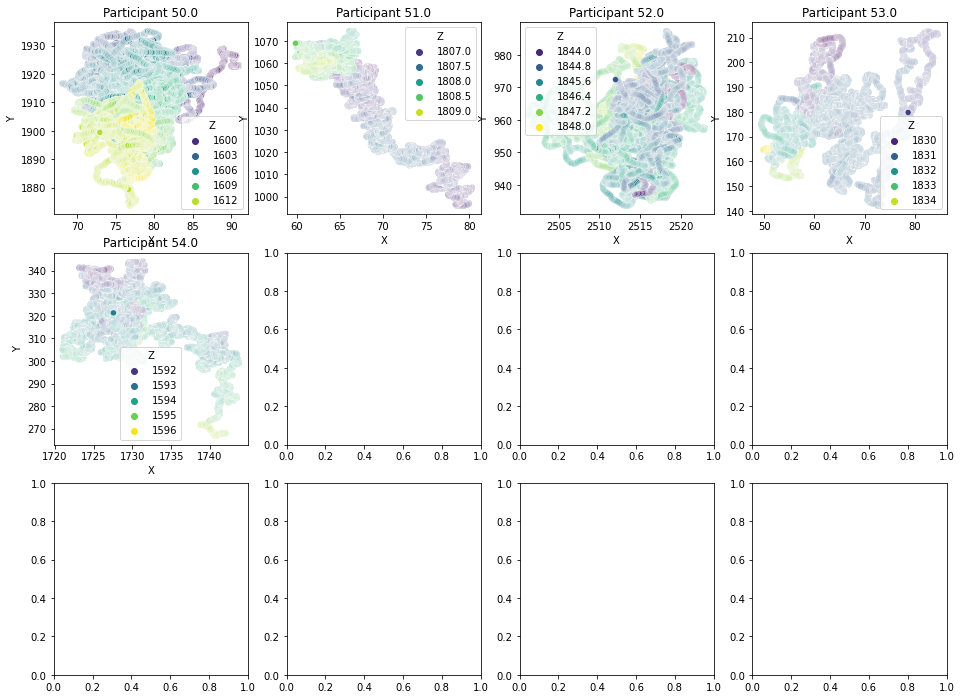

In [43]:
fig, axes_avail = plt.subplots(3, 4, figsize=(16,12))
Scatter_Group(F, axes_avail)
plt.show()

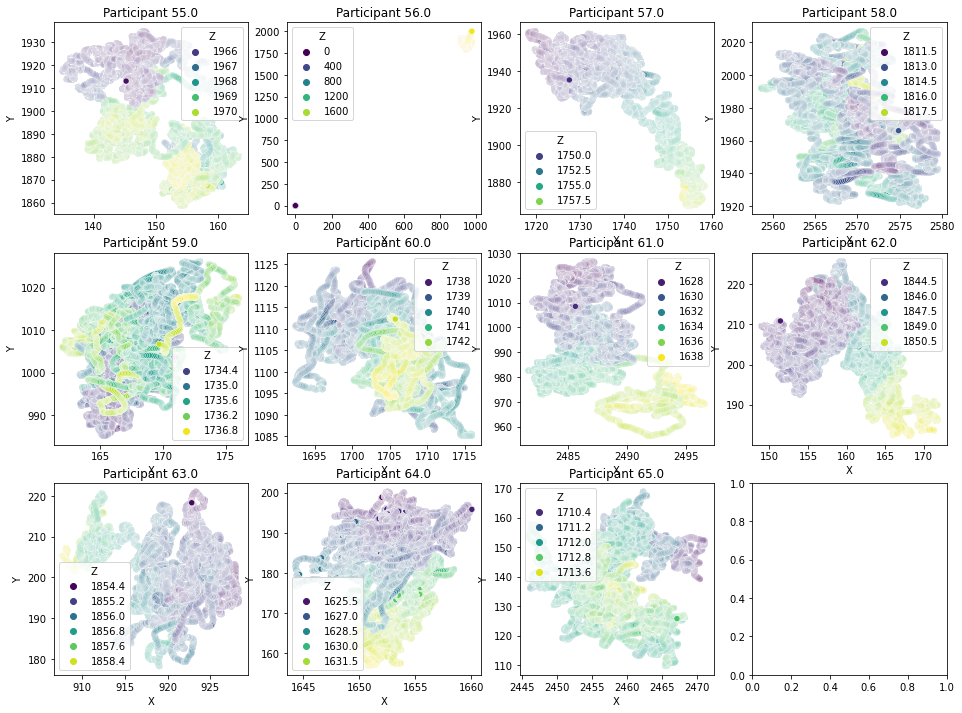

In [44]:
fig, axes_avail = plt.subplots(3, 4, figsize=(16,12))
Scatter_Group(G, axes_avail)
plt.show()

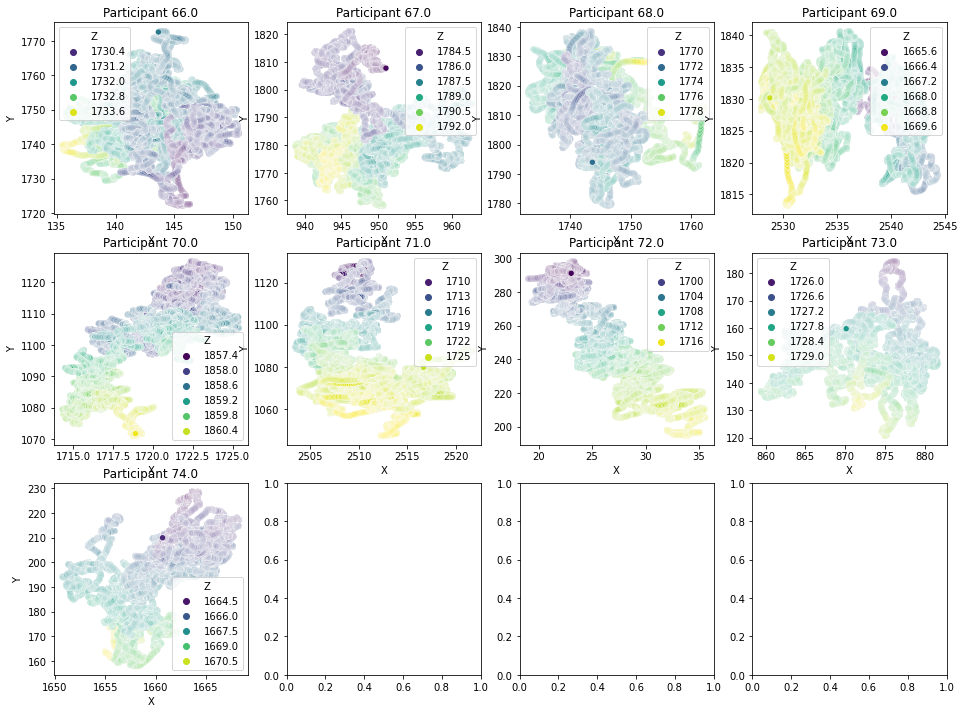

In [45]:
fig, axes_avail = plt.subplots(3, 4, figsize=(16,12))
Scatter_Group(H, axes_avail)
plt.show()

Looks like Participant 56 has some issue with their motin data, take a closer look

In [46]:
G[2].nunique()

X      20178
Y      24348
Z       5152
PID        1
dtype: int64

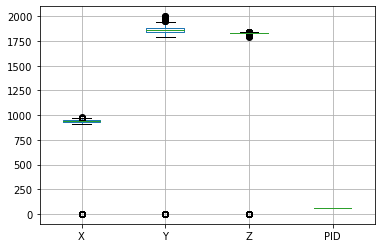

In [47]:
G[2].boxplot()
plt.show()

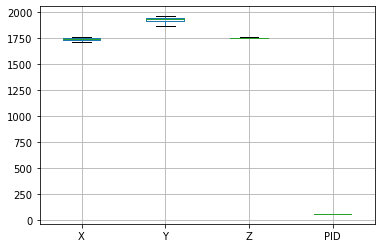

In [48]:
G[3].boxplot()
plt.show()

Particpant 56 should be removed as they appear to be missing a considerable amount of motion data

In [49]:
del G[2]
G.keys()

dict_keys(['count', 1, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [50]:
counts = []
for g in range(len(group)):
    counts.append(group[g]['count'])
counts

[8, 9, 12, 11, 9, 5, 11, 9]

In [51]:
group[0][1]['PID'][0]


1

In [62]:
#We will use the pyarow.feather package to export the dataframes of each participant for use in other notebooks
def export_participant_dfs(list_of_dicts):
    for g in range(len(group)):
        for GID in range(1,group[g]['count']+1):
            if GID not in group[g].keys():
                continue
            else:
                PID = str(group[g][GID]['PID'][0])
                filename = 'PID_motion_' + PID
                group[g][GID].to_pickle(r'DFs/Participant_Motion/' + filename + '.pkl')


In [64]:
#export each participant (commented out so as not to overwrite without intention)
#export_participant_dfs(group)

Note that PID 3 has NaN under 'Sex'. This was left in to simplify the PID import sequence. There are two total PID's with NaN in teh 'Sex' column and we will eliminate them prior to entering into model. If 'Sex' turns out to be a minimally dependant variable then we will add back in using M for one and F for the other in order to gain their motion data, otherwise they will just be dropped if 'Sex' is a strong variable as we don't want to sway the model with incorrect data.


# Summary
The data for both demographics was read in and combine so that we can view individual participant demopgrahic data with their motion data. The sound data is the next step bring in clean as needed. The EDA and feature engineering process will proceed with a single participant at first and then expanded to other participants.